In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os,json

In [2]:
#load and check the head of Data
df_info = pd.read_csv('superhero_info - superhero_info.csv')
df_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
#load and check the head of Data
df_powers = pd.read_csv('superhero_powers - superhero_powers.csv')
df_powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [4]:
#split column 'Hero|Publisher'
df_info['Hero|Publisher'].str.split('|',expand=True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [5]:
#save the 2 new columns into the dataframe
df_info[['Hero','Publisher']] = df_info['Hero|Publisher'].str.split('|',expand=True)
df_info.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [6]:
#drop the original column 
df_info = df_info.drop(columns='Hero|Publisher')
df_info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [7]:
#examining a single value from the measurements col
measur = df_info.loc[0,'Measurements']
print(type(measur))
measur

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [8]:
#replace single quotes with double quotes for all values in column
df_info['Measurements'] = df_info['Measurements'].str.replace("'",'"')
#apply the json.loads to the full column
df_info['Measurements'] = df_info['Measurements'].apply(json.loads)
df_info['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [9]:
#devide column into two
heig_weig = df_info['Measurements'].apply(pd.Series)
heig_weig

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [10]:
#replace cm from height
to_replace = [' cm']
#run a loop to replace all of the characters in the list at once
for char in to_replace:
    heig_weig['Height'] = heig_weig['Height'].str.replace(char,'',regex=False)

#replace kg from weight
to_replace_2 = [' kg']
#run a loop to replace all of the characters in the list at once
for char in to_replace_2:
    heig_weig['Weight'] = heig_weig['Weight'].str.replace(char,'',regex=False)
    
heig_weig['Weight'].head()

0    441.0
1     65.0
2     90.0
3    441.0
4    122.0
Name: Weight, dtype: object

In [11]:
#change type of columns to float
heig_weig['Weight'] = heig_weig['Weight'].astype('float')
heig_weig['Height'] = heig_weig['Height'].astype('float')

In [12]:
#concat heig_weig with original dataframe
df_info = pd.concat((df_info, heig_weig), axis = 1)
df_info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0


In [13]:
#drop original column
df_info = df_info.drop(columns='Measurements')

In [14]:
#check if types were changed
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      463 non-null    object 
 1   Race        463 non-null    object 
 2   Alignment   463 non-null    object 
 3   Hair color  463 non-null    object 
 4   Eye color   463 non-null    object 
 5   Skin color  463 non-null    object 
 6   Hero        463 non-null    object 
 7   Publisher   463 non-null    object 
 8   Height      463 non-null    float64
 9   Weight      463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


In [15]:
#check head of transformed dataframe
df_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


In [16]:
#check head of second dataframe
df_powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [17]:
#creat a new column with a string transformed to a list
df_powers['Powers_split'] = df_powers['Powers'].str.split(',')
df_powers.head()

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."


In [18]:
#exploding the column of lists
exploded = df_powers.explode('Powers_split')
exploded[['hero_names','Powers','Powers_split']].head(5)

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [19]:
#saving the unique values from the exploded column
cols_to_make = exploded['Powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [20]:
for col in cols_to_make:
    df_powers[col] = df_powers['Powers'].str.contains(col)
df_powers.head()

/Users/oleksandraaliyeva/opt/anaconda3/envs/dojo-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
#drop unnecessary columns
df_powers = df_powers.drop(columns = ['Powers', 'Powers_split'])

In [22]:
#rename column
df_powers = df_powers.rename(columns = {'hero_names': 'Hero'})
df_powers

,Hero,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [23]:
#combine two dataframes into one final DataFrame
df_heros = pd.merge(df_info,df_powers, on='Hero')
df_heros.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


In [24]:
#used code from:https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
#to change position of a column "Hero" for better look

#shift column 'Hero' to first position
first_column = df_heros.pop('Hero')

#insert column using insert(position,column_name,
#first_column) function
df_heros.insert(0, 'Hero', first_column)
df_heros.head(2)

,Hero,Gender,Race,Alignment,Hair color,Eye color,Skin color,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Male,Human,good,No Hair,yellow,Unknown,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,Icthyo Sapien,good,No Hair,blue,blue,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False


* Use your combined DataFrame to answer the following questions.

Compare the average weight of super powers who have Super Speed to those who do not.

What is the average height of heroes for each publisher?

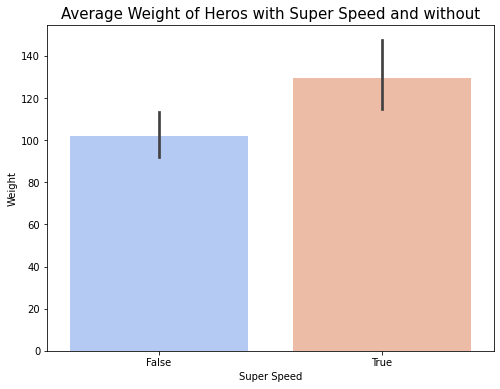

In [25]:
#create a boxplot
plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_heros, x = 'Super Speed', y = 'Weight', palette='coolwarm')
ax.set_title('Average Weight of Heros with Super Speed and without', fontsize=15);

In [26]:
#make a groupby of 'Super Speed' and 'Weight' to see mean weight
df_heros.groupby('Super Speed')['Weight'].mean()

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

Superheroes with Super Speed in average have a higher weight than the ones without Super Speed.

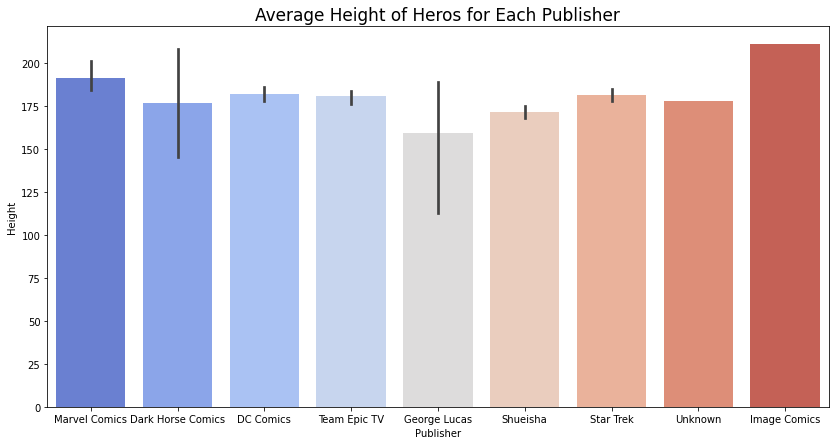

In [27]:
#create a boxplot
plt.figure(figsize=(14,7))
ax = sns.barplot(data = df_heros, x = 'Publisher', y = 'Height', palette='coolwarm')
ax.set_title('Average Height of Heros for Each Publisher', fontsize=17);

In [28]:
#make a groupby of 'Publisher' and 'Height' to see mean of height
df_heros.groupby('Publisher')['Height'].mean()

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

The average highest Superheroes has Publisher - Image Comics.